<a href="https://colab.research.google.com/github/RonnyGuevara/Fractal_Images/blob/main/TP4/TP4_FI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Lectura de librerías
import numpy as np
import matplotlib.pyplot as plt
import math

In [ ]:
def mandelbrot(re, im, max_iter):
  c = complex(re, im) #
  z = 0 + 0j #J permite crear un numero imaginario
  for i in range(max_iter):
    z = z*z+c
    if (z.real * z.real + z.imag * z.imag) >=4:
      return i
  return max_iter

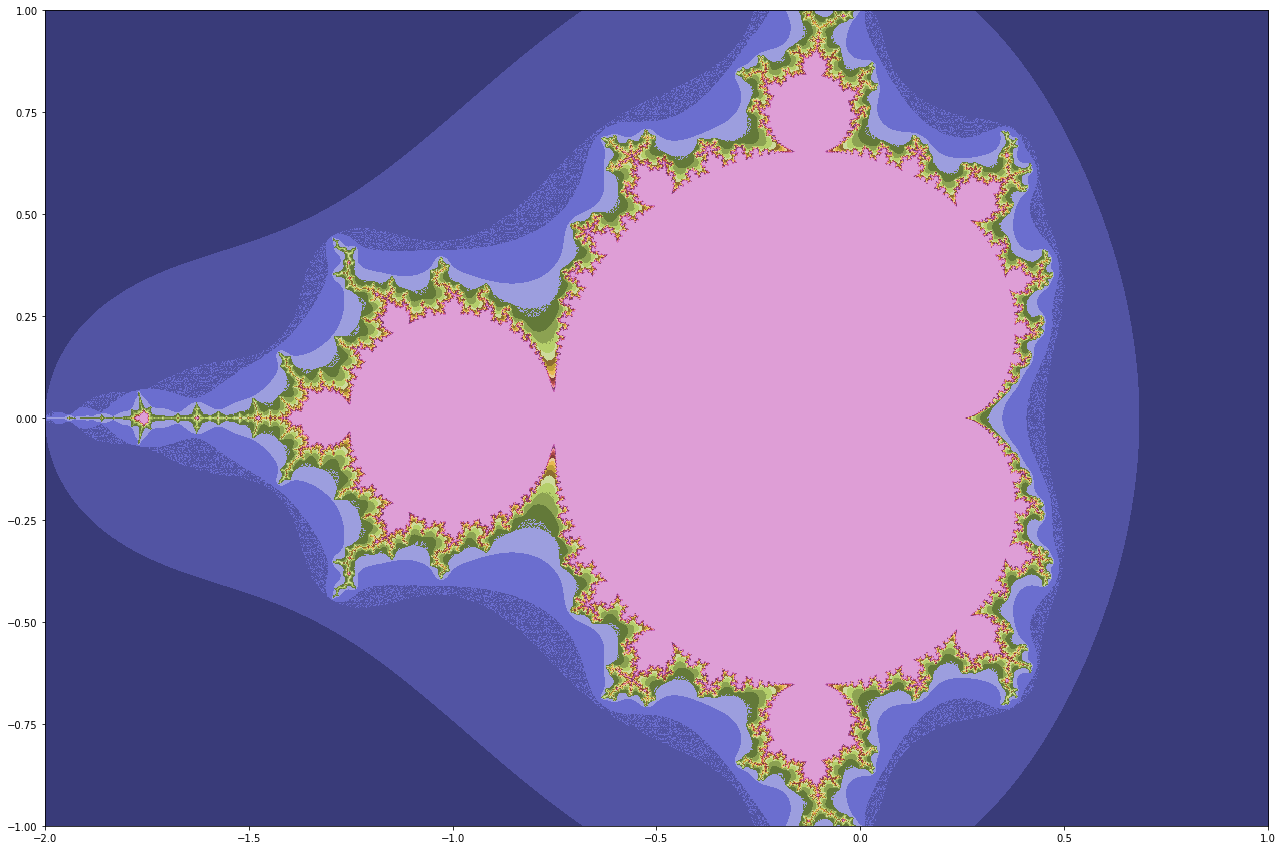

In [ ]:
columnas = 5000
filas = 5000
plano = np.zeros([filas,columnas])

plt.figure(figsize=(30, 15))

for indice_fila, re in enumerate(np.linspace(-2,1,num=filas)):
  for indice_columna, im in enumerate(np.linspace(-1,1,num=columnas)):
    plano [indice_columna,indice_fila] = mandelbrot(re,im,50)

plt.imshow(plano,cmap='tab20b', extent = [-2,1,-1,1])
#plt.savefig('fractal.png', dpi=1000)#opcion de guardado para posterior lectura y zoom de la imagen 
plt.show()